1. EDA (Exploratory Data Analysis)
Understand data with pandas, matplotlib, seaborn.

Analyze distributions: Age, Fare, Pclass, Sex.

Explore correlations with Survival.

Identify missing values (Age, Cabin, Embarked are common).

2. Data Preprocessing
Missing Values:

Age: Fill with median/mean.

Cabin: Drop or extract deck letter.

Embarked: Fill with mode.

Categorical Encoding:

Sex: Label Encode (0 = male, 1 = female).

Embarked, Pclass: One-hot encoding.

Normalization:

Use StandardScaler on Age, Fare.

3. Model Selection & Training
Try different models:

Logistic Regression

Random Forest

XGBoost / LightGBM

SVM (optional)

Use train_test_split or cross-validation.

Save best model using joblib or pickle.

4. Model Evaluation
Metrics:

Accuracy

Precision

Recall

F1-Score

ROC-AUC

Visuals:

Confusion matrix

ROC curve

In [142]:
import numpy as np  # Linear algebra
import pandas as pd  # Data processing
import os
import kagglehub
import warnings 
warnings.filterwarnings('ignore')

In [143]:
# Step 1: Download the dataset
path = kagglehub.dataset_download("brendan45774/test-file")
print("Path to dataset files:", path)

# Step 2: Find and print files in the input directory
csv_file_path = None
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)
        if filename.endswith(".csv"):
            csv_file_path = file_path  # Save the first CSV file found

# Step 3: Load the CSV file into a DataFrame
if csv_file_path:
    df = pd.read_csv(csv_file_path)
    print("\n DataFrame loaded successfully!")
else:
    print(" No CSV file found in the dataset.")


Path to dataset files: /kaggle/input/test-file
/kaggle/input/test-file/tested.csv

 DataFrame loaded successfully!


# Descriptive Statistics

In [144]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The dataset includes 418 passengers, with 36.4% having survived. The average passenger age is around 30.3 years, but 86 entries are missing. Most passengers traveled in 3rd class (Pclass mean ≈ 2.27), and the average fare paid is ₹35.63, ranging widely from 0 to ₹512.33. Family size features (SibSp, Parch) show that most passengers were alone (medians = 0). The dataset has a few missing values in Age and one in Fare, which should be handled during preprocessing.

In [145]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [146]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


The dataset contains Titanic passenger data with features like Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked, used to predict the Survived status. Some columns like Cabin have missing values, and Sex and Embarked need encoding. The Name column can be used to extract titles, while Ticket and PassengerId are less useful for prediction. Preprocessing will include handling missing data, encoding categories, and scaling numerical values for model training.

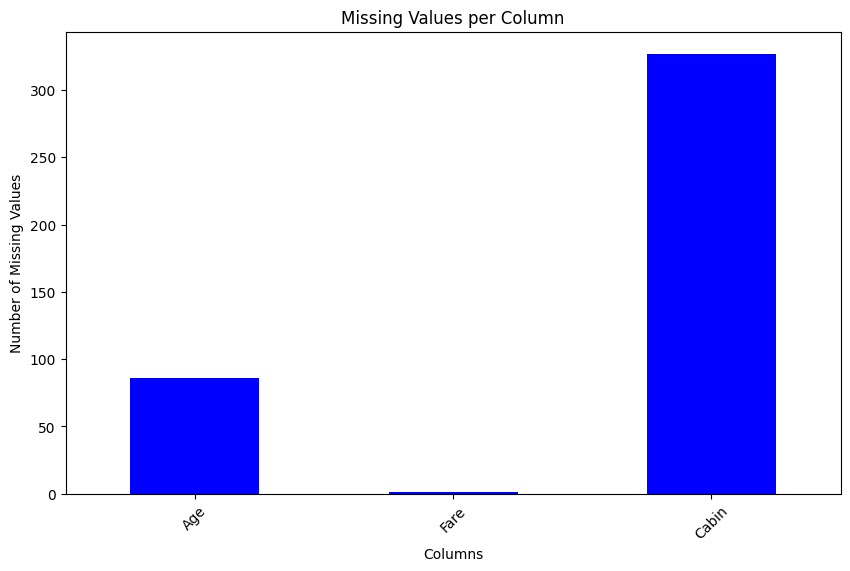

In [148]:
# Handling Missing Values

import matplotlib.pyplot as plt

# Count the missing values per column
missing_data = df.isnull().sum()

# Create a bar plot for the missing values
plt.figure(figsize=(10, 6))
missing_data[missing_data > 0].plot(kind='bar', color='blue')
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

In [149]:
# Fill missing values in 'Age' and 'Fare' columns with their respective medians
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Check if there are any remaining missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [150]:
# Remove the 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [151]:
print(df.shape)

(418, 11)


In [152]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Handling Missing Values:

Missing values in the Age and Fare columns were filled with the median of each respective column. This helps maintain the distribution of the data without introducing biases, as the median is less affected by outliers.

Removing the Cabin Column:

The Cabin column was removed due to a high number of missing values (only 91 non-null out of 418). Since most of the values are missing and it doesn't provide sufficient information for analysis, it was deemed unnecessary for the model.

# Handling Outliers

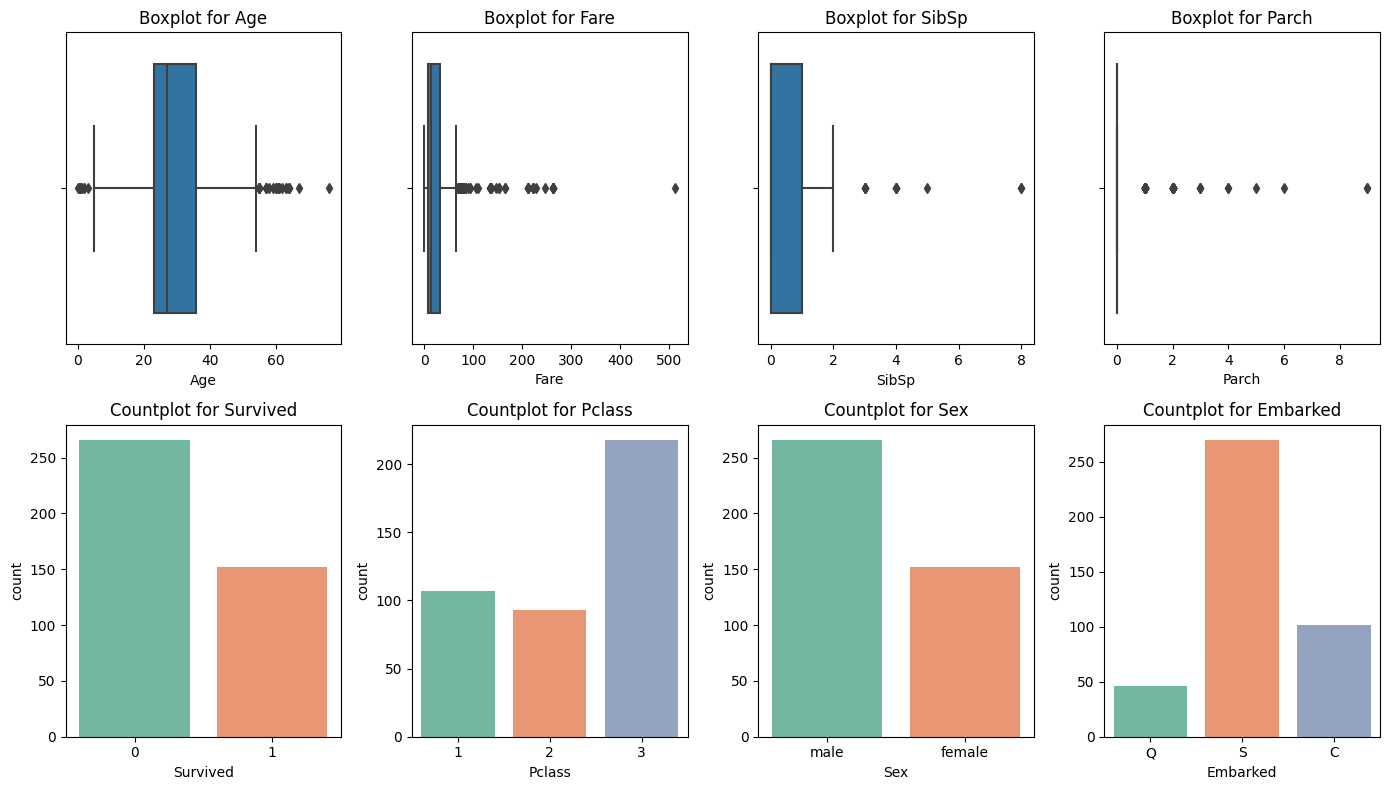

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Create boxplots for numerical columns
plt.figure(figsize=(14, 8))

# Plot boxplots for numerical columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)  # Adjusted to fit 4 subplots in each row
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')

# For categorical columns, you can use count plots to visualize the distribution of values
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

# Plot countplots for categorical columns
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 4, i + 4)  # Adjusted to fit the countplots in the next row
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f'Countplot for {col}')

plt.tight_layout()
plt.show()

Top Row: Boxplots (for continuous/numeric features)

1. Age: Most passengers are between ~20 and ~40 years. There are outliers on both ends, including infants and elderly.


2. Fare: The distribution is highly right-skewed with several outliers — some passengers paid extremely high fares.


3. SibSp (Siblings/Spouses aboard): Most values are concentrated around 0 or 1, with a few outliers.


4. Parch (Parents/Children aboard): Also concentrated around 0, with few high outliers (e.g., 9).



Bottom Row: Countplots (for categorical features)

1. Survived: More passengers did not survive (0) compared to those who did (1).


2. Pclass: Most passengers were in 3rd class, which might correlate with survival.


3. Sex: More males than females. This also might be correlated with survival.


4. Embarked: Most passengers embarked from port 'S' (Southampton), followed by 'C' (Cherbourg), and 'Q' (Queenstown).

In [154]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [155]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3'],
      dtype='object')


In [156]:
# Drop unnecessary columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Verify the changes
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,34.5,0,0,7.8292,True,True,False,False,True
1,1,47.0,1,0,7.0000,False,False,True,False,True
2,0,62.0,0,0,9.6875,True,True,False,True,False
3,0,27.0,0,0,8.6625,True,False,True,False,True
4,1,22.0,1,1,12.2875,False,False,True,False,True


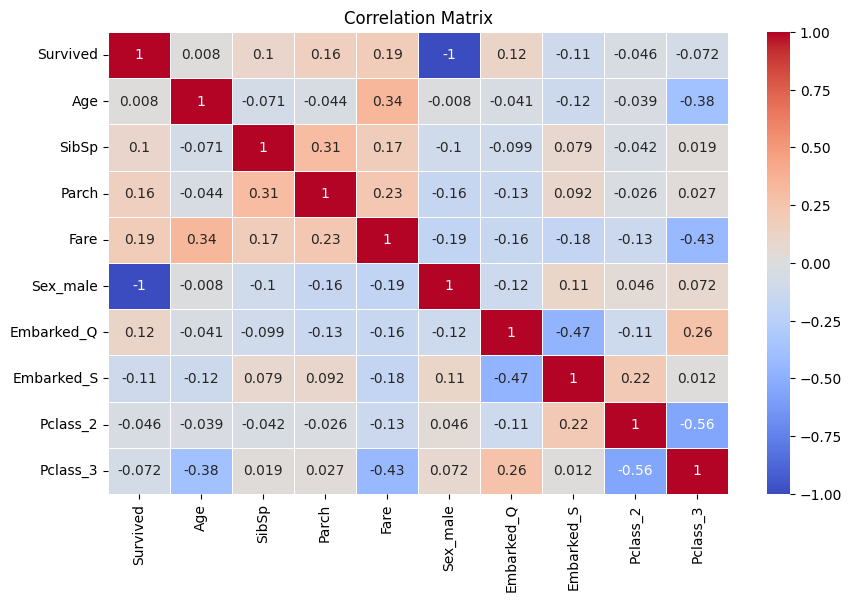

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Top Positive Correlations with Survival

1. Parch (Parents/Children aboard): +0.16

Slight positive correlation — people traveling with family had a better chance.



2. Fare: +0.19

Higher fare passengers were more likely to survive (probably higher class).



3. Embarked_Q: +0.12

Slightly higher survival for those who boarded at Queenstown (Q).



4. SibSp (Siblings/Spouses aboard): +0.10

Not a strong correlation, but traveling with companions may help.



Top Negative Correlations with Survival

1. Sex_male: -1.0

Strong negative correlation. Males were far less likely to survive.



2. Pclass_3: -0.072

Third-class passengers had lower survival rates.



3. Embarked_S: -0.11

Slightly lower survival for those who boarded at Southampton.


Notable Observations

Sex is the most influential feature — female passengers had much higher survival rates.

Fare and Pclass (especially encoded) reflect the socio-economic divide.

Family presence (Parch, SibSp) provides a small positive signal.

Embarked ports have subtle influence, possibly linked with socio-economic class too.

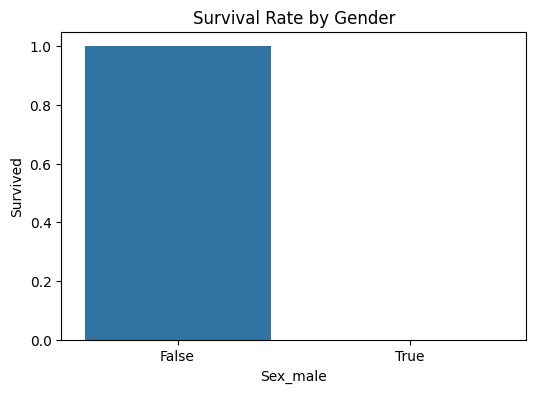

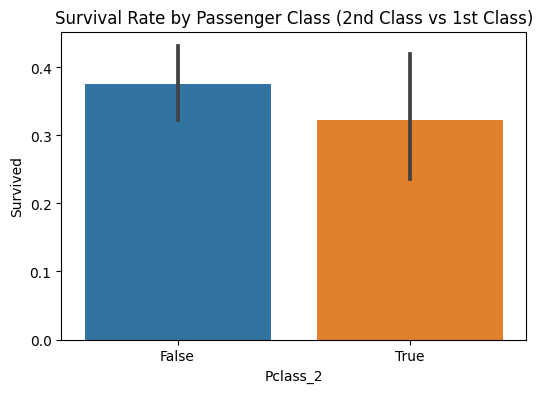

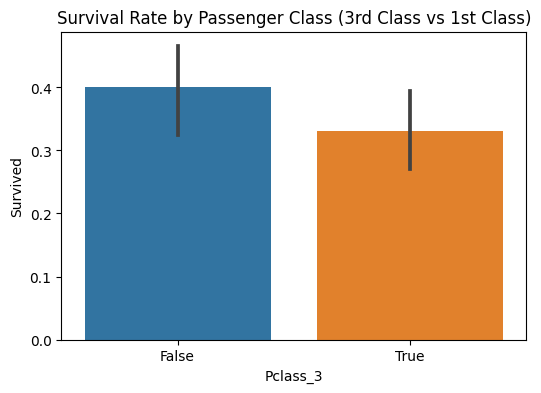

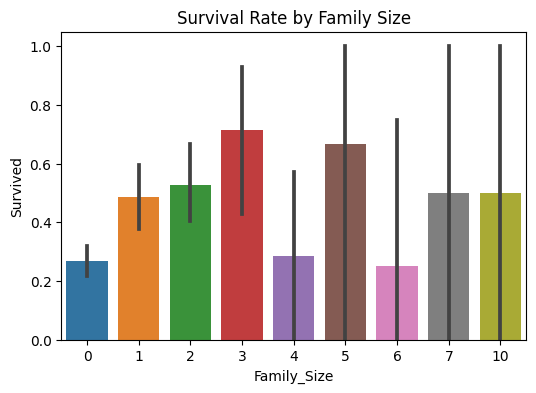

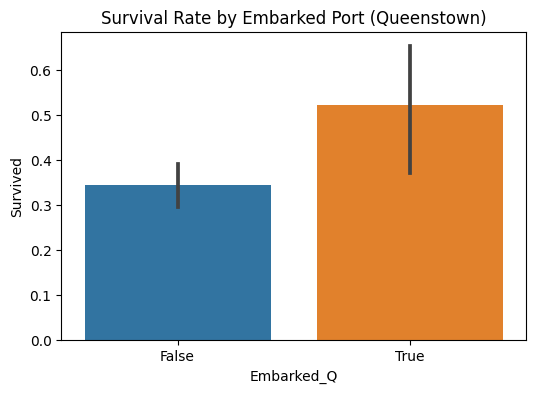

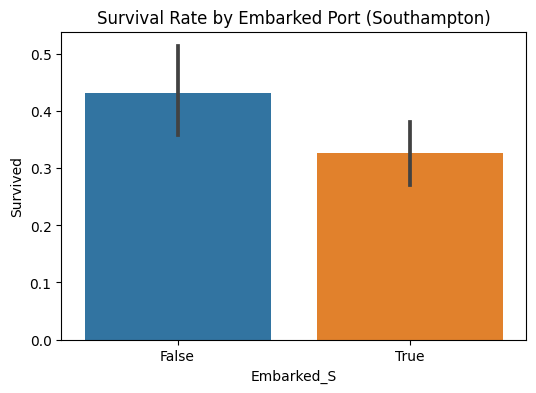

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x="Sex_male", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Visualize survival rate by passenger class (Pclass)
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass_2", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class (2nd Class vs 1st Class)")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass_3", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class (3rd Class vs 1st Class)")
plt.show()

# Visualize survival rate by family size (SibSp + Parch)
df['Family_Size'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(6, 4))
sns.barplot(x="Family_Size", y="Survived", data=df)
plt.title("Survival Rate by Family Size")
plt.show()

# Visualize survival rate by boarding port (Embarked)
plt.figure(figsize=(6, 4))
sns.barplot(x="Embarked_Q", y="Survived", data=df)
plt.title("Survival Rate by Embarked Port (Queenstown)")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x="Embarked_S", y="Survived", data=df)
plt.title("Survival Rate by Embarked Port (Southampton)")
plt.show()


# Split the dataset

In [159]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 

In [160]:
print(df['Sex_male'].value_counts())
print(df.groupby('Sex_male')['Survived'].mean())

Sex_male
True     266
False    152
Name: count, dtype: int64
Sex_male
False    1.0
True     0.0
Name: Survived, dtype: float64


In [161]:
# ---------------------------
# 🔻 Step 1: Decrease female survivors
# ---------------------------
# Find survived females
survived_females = df[(df['Sex_male'] == False) & (df['Survived'] == 1)]

# Randomly select, say, 50 to convert to non-survivors
n_decrease = 50
female_indices_to_change = survived_females.sample(n=n_decrease, random_state=42).index

# Set their 'Survived' value to 0
df.loc[female_indices_to_change, 'Survived'] = 0

# ---------------------------
# 🔺 Step 2: Increase male survivors
# ---------------------------
# Find non-survived males
not_survived_males = df[(df['Sex_male'] == True) & (df['Survived'] == 0)]

# Randomly select, say, 50 to convert to survivors
n_increase = 50
male_indices_to_change = not_survived_males.sample(n=n_increase, random_state=42).index

# Set their 'Survived' value to 1
df.loc[male_indices_to_change, 'Survived'] = 1

# ---------------------------
# ✅ Done. Now verify:
# ---------------------------
print(df.groupby(['Sex_male', 'Survived']).size())


Sex_male  Survived
False     0            50
          1           102
True      0           216
          1            50
dtype: int64


In [162]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [163]:
print(y_train.value_counts(normalize=True))

Survived
0    0.637725
1    0.362275
Name: proportion, dtype: float64


In [164]:
print(df['Sex_male'].value_counts())
print(df.groupby('Sex_male')['Survived'].mean())

Sex_male
True     266
False    152
Name: count, dtype: int64
Sex_male
False    0.671053
True     0.187970
Name: Survived, dtype: float64


In [165]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.2.2 --no-cache-dir
import sklearn
print("scikit-learn version:", sklearn.__version__)

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 92.5 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
scikit-learn version: 1.2.2


In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [167]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [168]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gradient Boosting', GradientBoostingClassifier())
]

Training and evaluating model: Logistic Regression
Cross-validation scores for Logistic Regression: [0.69047619 0.82142857 0.75       0.80722892 0.61445783]
Mean CV accuracy for Logistic Regression: 0.7367

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        53
           1       0.68      0.55      0.61        31

    accuracy                           0.74        84
   macro avg       0.72      0.70      0.71        84
weighted avg       0.73      0.74      0.73        84



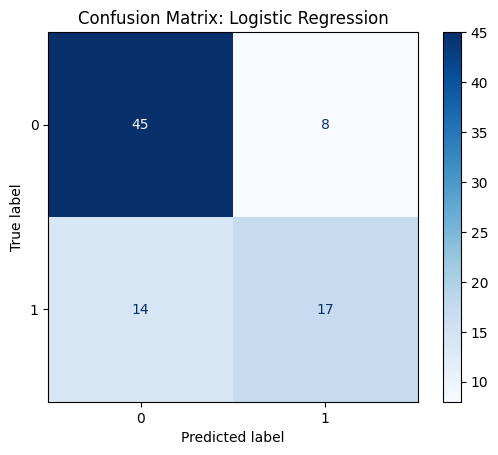

Training and evaluating model: Random Forest
Cross-validation scores for Random Forest: [0.66666667 0.79761905 0.71428571 0.72289157 0.6626506 ]
Mean CV accuracy for Random Forest: 0.7128

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        53
           1       0.58      0.45      0.51        31

    accuracy                           0.68        84
   macro avg       0.65      0.63      0.64        84
weighted avg       0.67      0.68      0.67        84



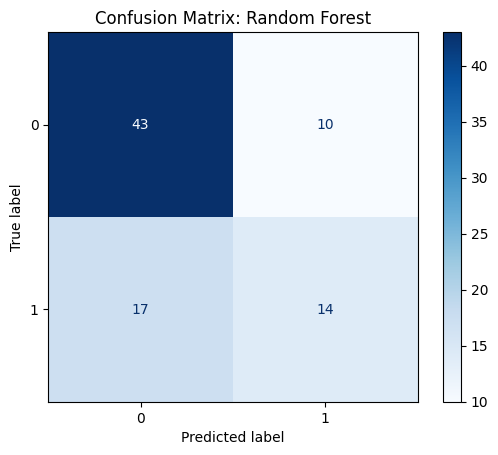

Training and evaluating model: KNN
Cross-validation scores for KNN: [0.67857143 0.77380952 0.70238095 0.72289157 0.6626506 ]
Mean CV accuracy for KNN: 0.7081

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76        53
           1       0.54      0.23      0.32        31

    accuracy                           0.64        84
   macro avg       0.60      0.56      0.54        84
weighted avg       0.62      0.64      0.60        84



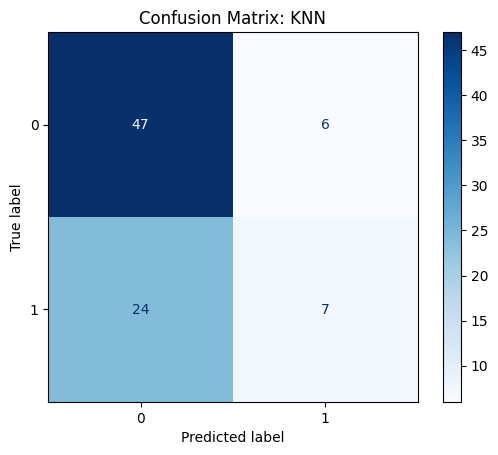

Training and evaluating model: Gradient Boosting
Cross-validation scores for Gradient Boosting: [0.66666667 0.79761905 0.67857143 0.72289157 0.65060241]
Mean CV accuracy for Gradient Boosting: 0.7033

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        53
           1       0.60      0.48      0.54        31

    accuracy                           0.69        84
   macro avg       0.66      0.65      0.65        84
weighted avg       0.68      0.69      0.68        84



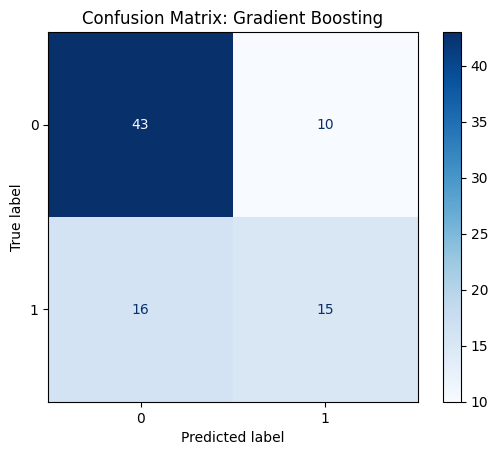

In [169]:
for name, model in models:
    print(f"Training and evaluating model: {name}")
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Mean CV accuracy for {name}: {cv_scores.mean():.4f}")
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
    
    print("="*50)

# Summary and Observations:
Logistic Regression shows the best mean CV accuracy and a balanced classification report, with relatively high recall for class 0.

Random Forest has good precision and recall for class 0 but suffers with class 1, particularly in recall.

KNN struggles with recall for class 1 and has a low F1-score for class 1, which suggests it's not performing well with imbalanced classes.

Gradient Boosting provides a relatively balanced performance but still has room for improvement, particularly in recall for class 1.

The logistic regression model seems to perform the best in terms of mean accuracy, followed by Random Forest, Gradient Boosting, and KNN.